<a href="https://colab.research.google.com/github/TejaSruthi/Registration-form/blob/master/Yolact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install cython
!pip install opencv-python pillow pycocotools matplotlib

In [0]:
pwd

'/content'

In [0]:
!git clone https://github.com/dbolya/yolact.git 

Cloning into 'yolact'...
remote: Enumerating objects: 2929, done.
remote: Total 2929 (delta 0), reused 0 (delta 0), pack-reused 2929
Receiving objects: 100% (2929/2929), 21.19 MiB | 15.17 MiB/s, done.
Resolving deltas: 100% (1997/1997), done.


In [0]:
cd "/content/yolact/external/DCNv2"

/content/yolact/external/DCNv2


In [0]:
!python setup.py build develop

running build
running build_ext
building '_ext' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/content
creating build/temp.linux-x86_64-3.6/content/yolact
creating build/temp.linux-x86_64-3.6/content/yolact/external
creating build/temp.linux-x86_64-3.6/content/yolact/external/DCNv2
creating build/temp.linux-x86_64-3.6/content/yolact/external/DCNv2/src
creating build/temp.linux-x86_64-3.6/content/yolact/external/DCNv2/src/cpu
creating build/temp.linux-x86_64-3.6/content/yolact/external/DCNv2/src/cuda
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -DWITH_CUDA -I/content/yolact/external/DCNv2/src -I/usr/local/lib/python3.6/dist-packages/torch/include -I/usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include -I/usr/local/lib/python3.6/dist-packages/torch/include/TH -I/usr/local/lib/python3.6/dist-packages/tor

In [0]:
cd "/content"

/content


In [0]:
!git clone https://github.com/chentinghao/download_google_drive.git
!mkdir -p /content/yolact/weights

Cloning into 'download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.


In [0]:
!python ./download_google_drive/download_gdrive.py 1ZPu1YR2UzGHQD0o1rEqy-j5bmEm3lbyP ./yolact/weights/yolact_plus_resnet50_54_800000.pth

129MB [00:02, 59.1MB/s]


In [0]:
# Make a new directory for the test images
!mkdir /content/test_images

# Make a new directory for realtime images
!mkdir /content/real_images

# Move to the new directory
%cd /content/test_images

# Make a list of URLs from the COCO dataset
get_imgs = ['http://farm8.staticflickr.com/7200/6946559805_7edf757660_z.jpg',
            'http://farm3.staticflickr.com/2835/9520716824_51220b13d0_z.jpg',
            'http://farm3.staticflickr.com/2817/10105052924_0c8d79e62c_z.jpg',
            'https://farm3.staticflickr.com/2637/3679968895_37a79e55b3_z.jpg',
            'https://farm8.staticflickr.com/7137/7705349298_6bea29cf1c_z.jpg',
            'http://farm5.staticflickr.com/4105/4981945644_3f162314ed_z.jpg',
            'http://farm1.staticflickr.com/40/101757885_a8fc40e273_z.jpg',
            'http://farm3.staticflickr.com/2654/3897535041_fa8dd5570b_z.jpg']

# Download all the images
for img_url in get_imgs:
  !wget {img_url} -nc

# List the contents of the folder. Should have images.
!pwd
!ls

/content/test_images
--2020-03-31 07:17:00--  http://farm8.staticflickr.com/7200/6946559805_7edf757660_z.jpg
Resolving farm8.staticflickr.com (farm8.staticflickr.com)... 143.204.102.213, 2600:9000:21f3:a000:0:5a51:64c9:c681, 2600:9000:21f3:c00:0:5a51:64c9:c681, ...
Connecting to farm8.staticflickr.com (farm8.staticflickr.com)|143.204.102.213|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm8.staticflickr.com/7200/6946559805_7edf757660_z.jpg [following]
--2020-03-31 07:17:00--  https://farm8.staticflickr.com/7200/6946559805_7edf757660_z.jpg
Connecting to farm8.staticflickr.com (farm8.staticflickr.com)|143.204.102.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘6946559805_7edf757660_z.jpg’

6946559805_7edf7576     [ <=>                ]  52.94K  --.-KB/s    in 0.009s  

2020-03-31 07:17:00 (5.83 MB/s) - ‘6946559805_7edf757660_z.jpg’ saved [54206]

--2020-03-31 07:17:03-

In [0]:
# Move up to the top level directory
%cd /content

# Delete any previous output_images folder (in case we're running this more than once)
!rm /content/output_images -r

# Delete any previous real_output folder (in case we're running this more than once)
!rm /content/real_output -r

# Create a new directory for output images
!mkdir -p /content/output_images

# Create a new directory for o images
!mkdir -p /content/real_output

# Run inference using our pre-trained weights on all images in the directory
!python ./yolact/eval.py --trained_model=./yolact/weights/yolact_plus_resnet50_54_800000.pth --config=yolact_plus_resnet50_config --score_threshold=0.15 --top_k=15 --images=test_images:output_images

/content
rm: cannot remove '/content/output_images': No such file or directory
rm: cannot remove '/content/real_output': No such file or directory
Loading model... Done.

test_images/6946559805_7edf757660_z.jpg -> output_images/6946559805_7edf757660_z.png
test_images/4981945644_3f162314ed_z.jpg -> output_images/4981945644_3f162314ed_z.png
test_images/3679968895_37a79e55b3_z.jpg -> output_images/3679968895_37a79e55b3_z.png
test_images/10105052924_0c8d79e62c_z.jpg -> output_images/10105052924_0c8d79e62c_z.png
test_images/101757885_a8fc40e273_z.jpg -> output_images/101757885_a8fc40e273_z.png
test_images/7705349298_6bea29cf1c_z.jpg -> output_images/7705349298_6bea29cf1c_z.png
test_images/9520716824_51220b13d0_z.jpg -> output_images/9520716824_51220b13d0_z.png
test_images/3897535041_fa8dd5570b_z.jpg -> output_images/3897535041_fa8dd5570b_z.png
Done.


output_images/6946559805_7edf757660_z.png


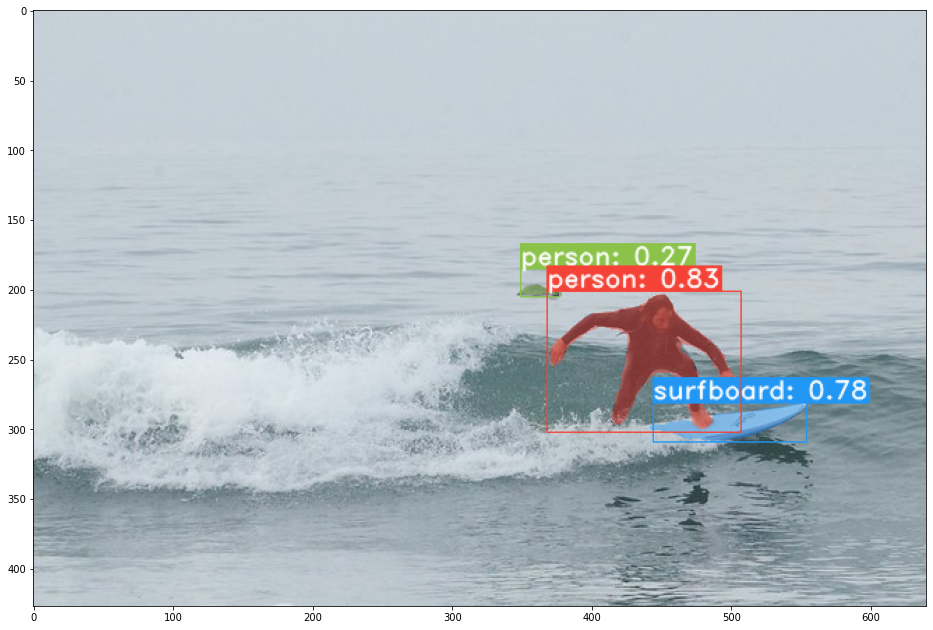

output_images/101757885_a8fc40e273_z.png


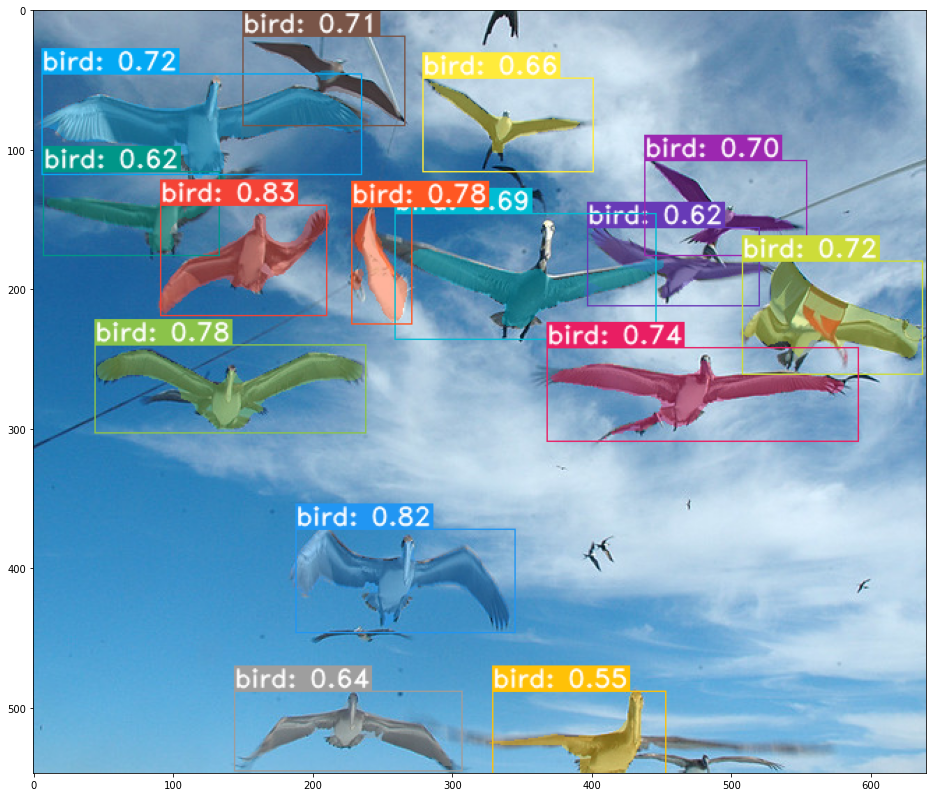

output_images/3679968895_37a79e55b3_z.png


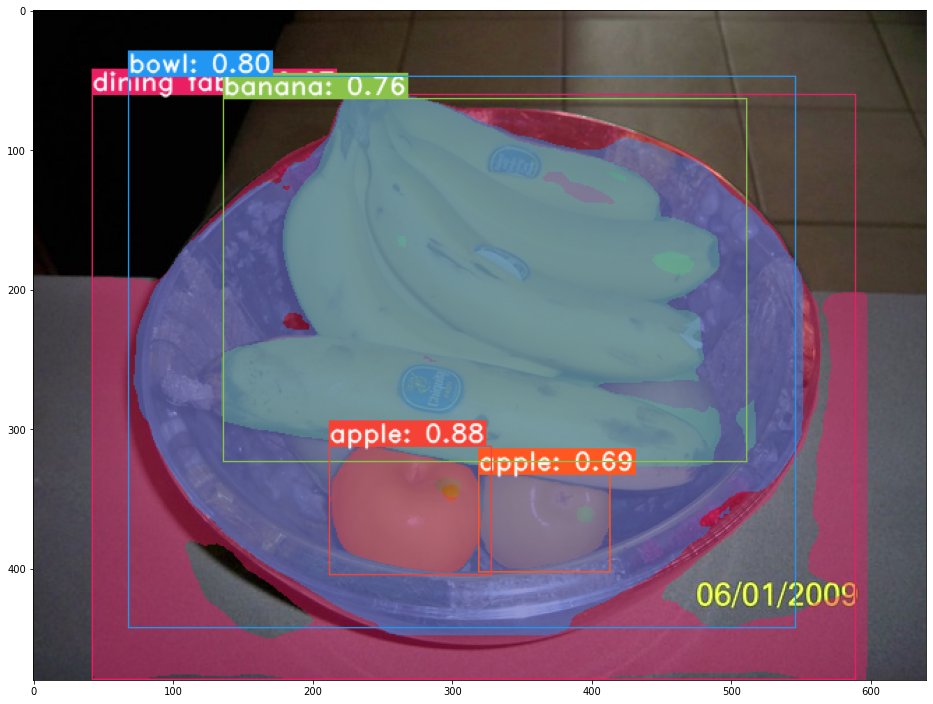

output_images/10105052924_0c8d79e62c_z.png


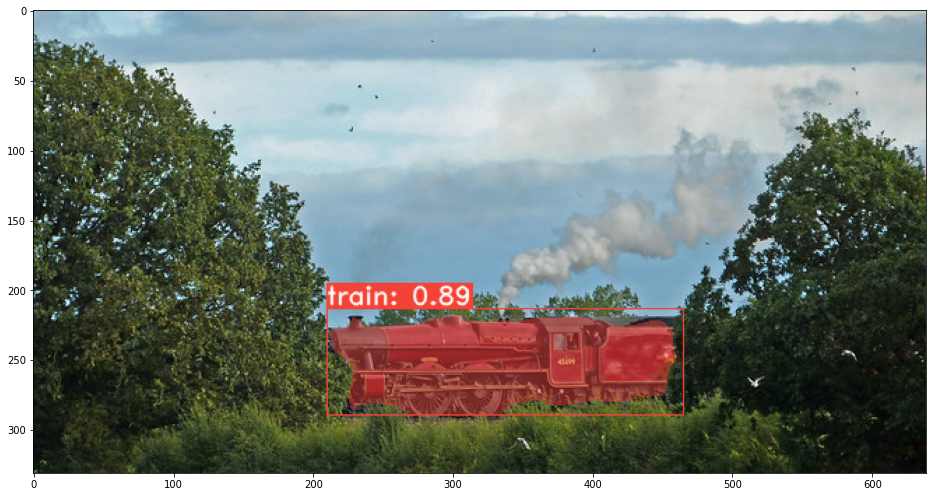

output_images/4981945644_3f162314ed_z.png


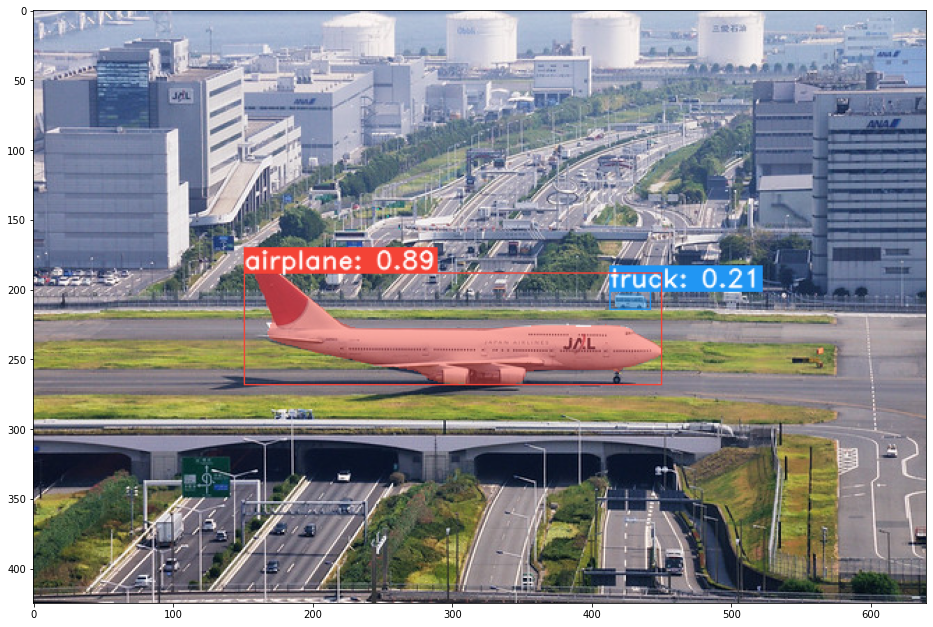

output_images/9520716824_51220b13d0_z.png


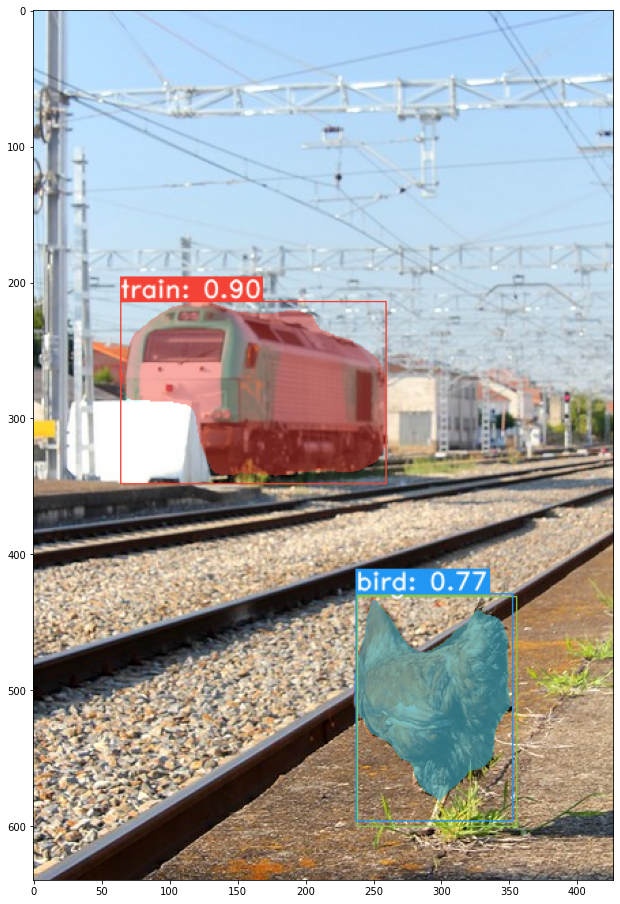

output_images/7705349298_6bea29cf1c_z.png


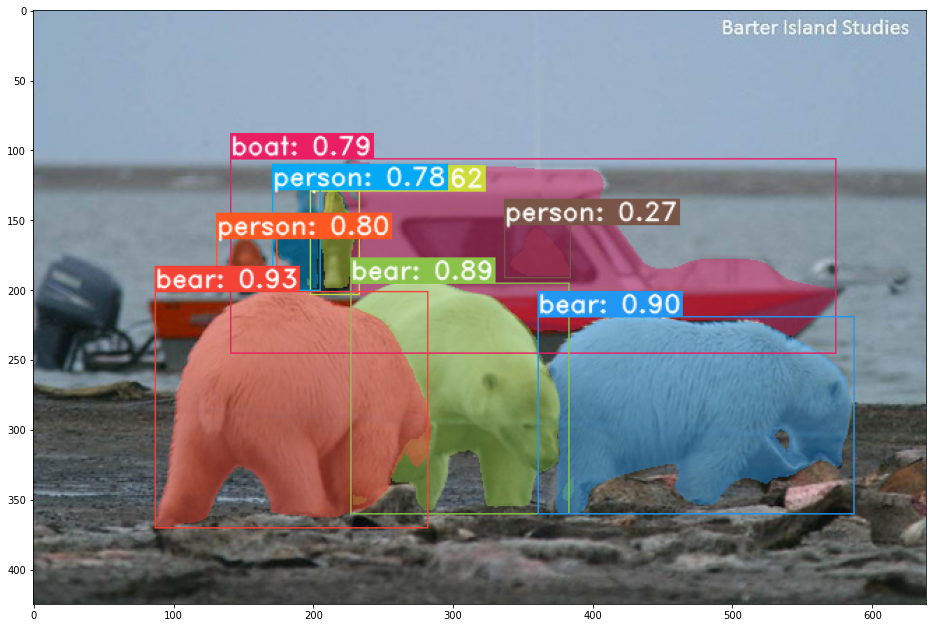

output_images/3897535041_fa8dd5570b_z.png


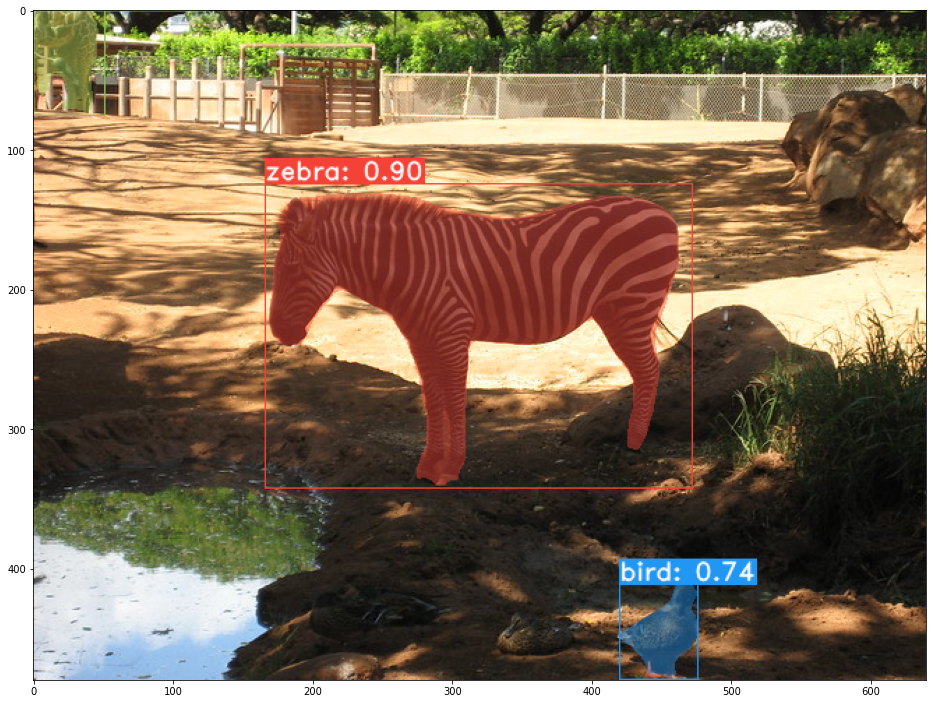

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

output_images = Path('output_images')

def show_image(img_path):
  img = cv2.imread(img_path)
  img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(16,16))
  plt.imshow(img_cvt)
  plt.show()

# Iterate through all of the output images and display them
for img_path in output_images.iterdir():
  print(img_path)
  show_image(str(img_path))

In [0]:
%cd real_images/

/content/real_images


In [0]:
#for photo

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


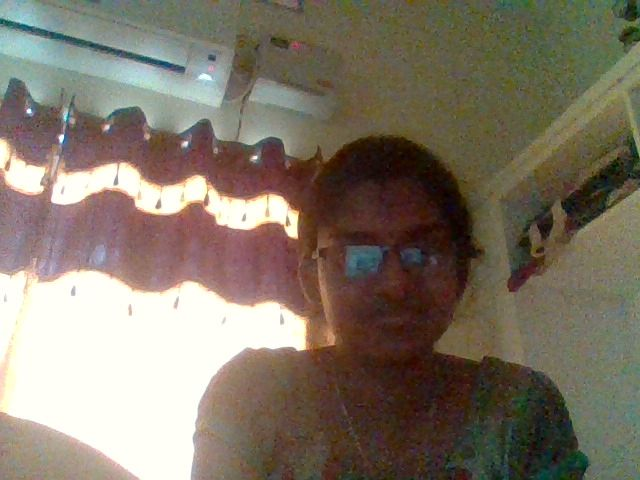

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
%cd /content/

/content


In [0]:
!python ./yolact/eval.py --trained_model=./yolact/weights/yolact_plus_resnet50_54_800000.pth --config=yolact_plus_resnet50_config --score_threshold=0.15 --top_k=15 --images=real_images:real_output

Loading model... Done.

real_images/photo.jpg -> real_output/photo.png
Done.


In [0]:
# Make a new directory for the test images
!mkdir -p /content/test_video

# Move to the top level directory
%cd /content
#https://drive.google.com/file/d/1h4ktOD_zoN7xBE_8-ItSmJu23c7lYZgV/view?usp=sharing
# Download the file
# https://drive.google.com/file/d/1I4fivRLniVNt_LcWqhQNehTSdEkZ4ytW/view?usp=sharing
# Note that file_id is extracted from the share URL above, it'll be different for every file
file_id = "1h4ktOD_zoN7xBE_8-ItSmJu23c7lYZgV"
file_path = "/content/test_video/road_full_720.mp4" # <- this is the destination path

!python /content/download_google_drive/download_gdrive.py {file_id} {file_path}

!ls /content/test_video

/content
56.0MB [00:02, 28.8MB/s]
road_full_720.mp4


In [0]:
%cd /content
!mkdir -p /content/output_videos
output_path = "/content/output_videos/road_full_720_output.mp4"
!python ./yolact/eval.py --trained_model=./yolact/weights/yolact_plus_resnet50_54_800000.pth --score_threshold=0.15 --top_k=15 --video_multiframe=4 --video={file_path}:{output_path}

/content
Config not specified. Parsed yolact_plus_resnet50_config from the file name.

Loading model... Done.
Initializing model... Done.

Processing Frames  ██████████████████████████████   7392 /   7392 (100.00%)     6.96 fps        


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!mkdir -p /content/drive/My\ Drive/YOLACT_output
%cd /content/drive/My\ Drive/YOLACT_output
!ls

/content/drive/My Drive/YOLACT_output
